In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scan

### Lorenz Prediction

In [65]:
simulation_time_steps = 50000

starting_point = np.array([-14.03020521, -20.88693127, 25.53545])
sim_data = scan.simulations.Lorenz63(dt=2e-2).simulate(time_steps=10000, starting_point=starting_point)

In [68]:
train_steps = 400
train_data = sim_data[:train_steps]

ng_rc = scan.ngrc.NG_RC(regression_parameter=9*10**-2,
      k=2,
      s=1,
      orders=[1,2],
      mode='differences'
    )

ng_rc.fit(train_data)
lorenz_prediction = ng_rc.predict(steps=2000,starting_series=sim_data[-ng_rc._k*ng_rc._s:])

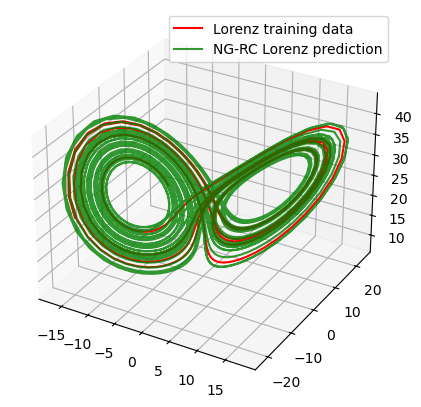

In [69]:
fig1 = plt.figure(figsize=(8, 5), dpi=100)

ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot(sim_data[:train_steps,0], sim_data[:train_steps,1], sim_data[:train_steps,2],
        alpha=1, color='red', label='Lorenz training data')
ax1.plot(lorenz_prediction[:,0], lorenz_prediction[:,1], lorenz_prediction[:,2],
        alpha=.8, color='green', label='NG-RC Lorenz prediction')

plt.legend()
plt.show()

### Lorenz Inference

In [70]:
simulation_time_steps = 10000

starting_point = np.array([-14.03020521, -20.88693127, 25.53545])
sim_data = scan.simulations.Lorenz63(dt=5e-2).simulate(time_steps=simulation_time_steps, starting_point=starting_point)

x_y_train_data = sim_data[:,:-1]
z_target_data = sim_data[:,-1]

In [71]:
train_steps = 1000
train_data = x_y_train_data[:train_steps]
target_data = z_target_data[:train_steps]

test_data = sim_data[:,:-1]

ng_rc = scan.ngrc.NG_RC(regression_parameter=0.001,
      k=4,
      s=5,
      orders=[1,2],
      mode='inference',
    )

ng_rc.fit(train_data,y_target=target_data)
lorenz_inference=ng_rc.inference(data=test_data)


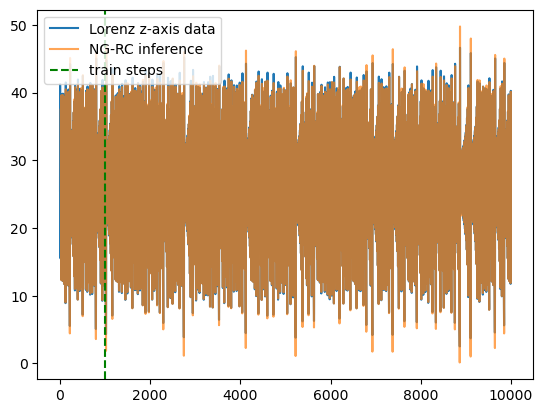

In [72]:
warm_up_time = (ng_rc._k-1)*ng_rc._s+1
plt.plot(np.arange(0,simulation_time_steps),z_target_data,label='Lorenz z-axis data')
plt.plot(np.arange(warm_up_time,simulation_time_steps),lorenz_inference,label='NG-RC inference',alpha=0.7)
plt.axvline(x = train_steps,color='green',label = 'train steps',ls = '--')

plt.legend()
plt.show()